Reading the data set as data frame, Importing the required libraries

In [45]:
import pandas as pd
import matplotlib
%matplotlib inline
df= pd.read_csv("gsuite.csv")
df.head()

,time,metric_name,metric_value
0,2015-03-23T00:00:00.000-0400,google.accounts:apps_total_licenses,0
1,2015-03-23T00:00:00.000-0400,google.accounts:apps_used_licenses,0
2,2015-03-23T00:00:00.000-0400,google.accounts:authorized_apps,0
3,2015-03-23T00:00:00.000-0400,google.accounts:coordinate_total_licenses,0
4,2015-03-23T00:00:00.000-0400,google.accounts:drive_used_quota_in_mb,9537833


In [47]:
df.dtypes

time            object
metric_name     object
metric_value     int64
dtype: object

In [33]:
df.index

RangeIndex(start=0, stop=611913, step=1)

In [34]:
df['time']= pd.to_datetime(df.time)

In [35]:
df.dtypes

time            datetime64[ns]
metric_name             object
metric_value             int64
dtype: object

creating a new column with month

In [36]:
df['month']= df.time.dt.month
df.head()

,time,metric_name,metric_value,month
0,2015-03-23 04:00:00,google.accounts:apps_total_licenses,0,3
1,2015-03-23 04:00:00,google.accounts:apps_used_licenses,0,3
2,2015-03-23 04:00:00,google.accounts:authorized_apps,0,3
3,2015-03-23 04:00:00,google.accounts:coordinate_total_licenses,0,3
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833,3


Dropping all rows with negative no of users and 0 users.

In [37]:
df = df[df['metric_value'] > 0]

df.head()

,time,metric_name,metric_value,month
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833,3
5,2015-03-23 04:00:00,google.accounts:gmail_used_quota_in_mb,29158045,3
6,2015-03-23 04:00:00,google.accounts:gplus_photos_used_quota_in_mb,659544,3
7,2015-03-23 04:00:00,google.accounts:num_1day_logins,16814,3
8,2015-03-23 04:00:00,google.accounts:num_30day_logins,24022,3


In [38]:
print(df.index)
print(df.describe())
df.head(10)

Int64Index([     4,      5,      6,      7,      8,      9,     10,     11,
                12,     13,
            ...
            611849, 611850, 611851, 611852, 611854, 611855, 611866, 611867,
            611868, 611911],
           dtype='int64', length=263310)
       metric_value          month
count  2.633100e+05  263310.000000
mean   2.387988e+06       6.461502
std    1.756390e+07       3.323856
min    1.000000e+00       1.000000
25%    4.000000e+01       4.000000
50%    8.510000e+02       6.000000
75%    1.050900e+04       9.000000
max    2.740330e+08      12.000000


,time,metric_name,metric_value,month
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833,3
5,2015-03-23 04:00:00,google.accounts:gmail_used_quota_in_mb,29158045,3
6,2015-03-23 04:00:00,google.accounts:gplus_photos_used_quota_in_mb,659544,3
7,2015-03-23 04:00:00,google.accounts:num_1day_logins,16814,3
8,2015-03-23 04:00:00,google.accounts:num_30day_logins,24022,3
9,2015-03-23 04:00:00,google.accounts:num_7day_logins,21763,3
10,2015-03-23 04:00:00,google.accounts:num_authorized_apps,2393,3
11,2015-03-23 04:00:00,google.accounts:num_delegated_admins,25,3
12,2015-03-23 04:00:00,google.accounts:num_disabled_accounts,34125,3
13,2015-03-23 04:00:00,google.accounts:num_locked_users,2,3


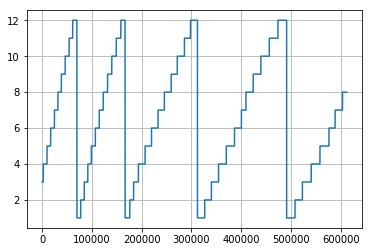

In [39]:
df['month'].plot(grid=True)

retrieving data between two dates by masking the rest of the dataset

In [40]:

from datetime import datetime
start= datetime(2018, 1 ,1)
end= datetime(2018, 6, 30)
mask = (df['time'] > start) & (df['time'] <= end)
df.loc[mask].head()



,time,metric_name,metric_value,month
312206,2018-01-01 05:00:00,google.accounts:drive_used_quota_in_mb,125169168,1
312207,2018-01-01 05:00:00,google.accounts:gmail_used_quota_in_mb,70401973,1
312208,2018-01-01 05:00:00,google.accounts:gplus_photos_used_quota_in_mb,2047455,1
312209,2018-01-01 05:00:00,google.accounts:num_1day_logins,3667,1
312210,2018-01-01 05:00:00,google.accounts:num_30day_logins,22214,1
